In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar dataset
df = pd.read_csv("./Transformados/Dataset_clustering.csv", sep = ';')
df.head()

,Provincia,Trimestre,Anio,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,...,Desigualdad_p80p20,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_sl,Soc_num_sociedades_total,Soc_desembolso_sociedades_total,Paro_tasa_actividad,Paro_tasa_paro,Paro_tasa_empleo
0,Albacete,1,2017,0.000000,0.383048,0.025537,0.715023,0.0,0.000000,0.280902,...,2.8,2,120,597,21072,599,21192,57.42,24.48,43.36
1,Albacete,1,2018,0.025659,0.307913,0.000000,0.615827,0.0,0.076978,0.564508,...,2.7,2,215,611,48812,613,49027,58.97,23.82,44.92
2,Albacete,1,2019,0.000000,0.334508,0.000000,0.874866,0.0,0.025731,0.720478,...,2.6,2,75,666,52544,668,52619,57.38,17.85,47.13
3,Albacete,1,2020,0.000000,0.309125,0.000000,0.695532,0.0,0.025760,0.412167,...,2.6,3,175,486,9362,489,9537,56.58,20.72,44.85
4,Albacete,1,2021,0.000000,0.464056,0.000000,0.515618,0.0,0.051562,0.592961,...,2.6,3,164,617,21662,620,21826,57.58,19.93,46.10


In [6]:
# Variables seleccionadas para clustering
#features = [columna for columna in df.columns if columna not in ['Provincia','Anio','Trimestre']]
features = ['Inm_De Africa',
 'Inm_De América del Norte',
 'Inm_De Asia',
 'Inm_De Centro América y Caribe',
 'Inm_De Oceanía',
 'Inm_De Sudamérica',
 'Inm_Europa_UE',
 'Inm_Europa_no_UE',
 'EM_Total',
 'EM_Hombres',
 'EM_Mujeres',
 'IPC_01_alimentos',
 'IPC_02_tabaco',
 'IPC_03_vestido',
 'IPC_04_vivienda',
 'IPC_05_hogar',
 'IPC_06_sanidad',
 'IPC_07_transporte',
 'IPC_08_comunicaciones',
 'IPC_09_ocio',
 'IPC_10_enseñanza',
 'IPC_11_restaurantes',
 'IPC_12_otros',
 'IPC_00_general',
 'Pobl_Hombres',
 'Pobl_Mujeres',
 'Pobl_Total poblacion',
 'Desigualdad_gini',
 'Desigualdad_p80p20',
 'Soc_num_sociedades_sa',
 'Soc_desmboldo_sociedades_sa',
 'Soc_num_sociedades_sl',
 'Soc_desembolso_sociedades_sl',
 'Soc_num_sociedades_total',
 'Soc_desembolso_sociedades_total',
 'Paro_tasa_actividad',
 'Paro_tasa_paro',
 'Paro_tasa_empleo']

In [7]:
#Dataframe con features para el clustering
df_clust = df[features]
df_clust.head()

,Inm_De Africa,Inm_De América del Norte,Inm_De Asia,Inm_De Centro América y Caribe,Inm_De Oceanía,Inm_De Sudamérica,Inm_Europa_UE,Inm_Europa_no_UE,EM_Total,EM_Hombres,...,Desigualdad_p80p20,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_sl,Soc_num_sociedades_total,Soc_desembolso_sociedades_total,Paro_tasa_actividad,Paro_tasa_paro,Paro_tasa_empleo
0,6071,210,800,608,6,4857,1488,10157,42.84,41.71,...,2.8,2,120,597,21072,599,21192,57.42,24.48,43.36
1,6495,222,826,656,9,4980,1518,10088,43.12,41.98,...,2.7,2,215,611,48812,613,49027,58.97,23.82,44.92
2,7007,234,890,752,9,5154,1534,9857,43.41,42.25,...,2.6,2,75,666,52544,668,52619,57.38,17.85,47.13
3,7708,234,961,973,6,5830,1556,9925,43.67,42.52,...,2.6,3,175,486,9362,489,9537,56.58,20.72,44.85
4,8200,236,967,1046,6,6159,1936,9738,43.85,42.71,...,2.6,3,164,617,21662,620,21826,57.58,19.93,46.10


In [8]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)

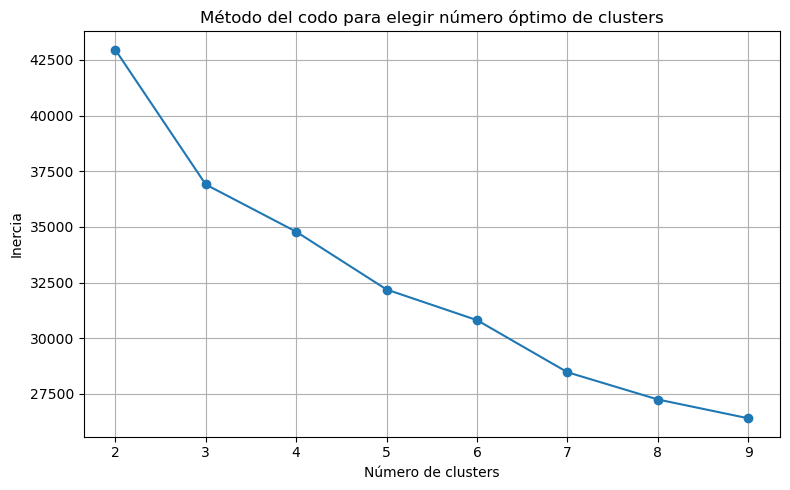

In [9]:
# Método del codo
inertia = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title("Método del codo para elegir número óptimo de clusters")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Aplicar clustering (elige K manualmente)
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Resultados
print("Distribución de clusters:")
print(df["cluster"].value_counts())

print("\nPromedio por cluster:")
print(df.groupby("cluster")[features].mean())




Distribución de clusters:
cluster
0    601
3    478
4    311
2    210
1     64
Name: count, dtype: int64

Promedio por cluster:
         Inm_De Africa  Inm_De América del Norte    Inm_De Asia  \
cluster                                                           
0         15063.173045                560.785358    3225.231281   
1        119140.218750              17995.843750  101215.437500   
2         47525.714286               2658.519048   15183.642857   
3          3958.023013                520.060669    1314.771967   
4         13207.163987                989.803859    3206.045016   

         Inm_De Centro América y Caribe  Inm_De Oceanía  Inm_De Sudamérica  \
cluster                                                                      
0                           3882.881864       38.183028        8987.757072   
1                          67482.875000      886.046875      206945.687500   
2                           8696.552381      256.428571       42572.252381   
3           

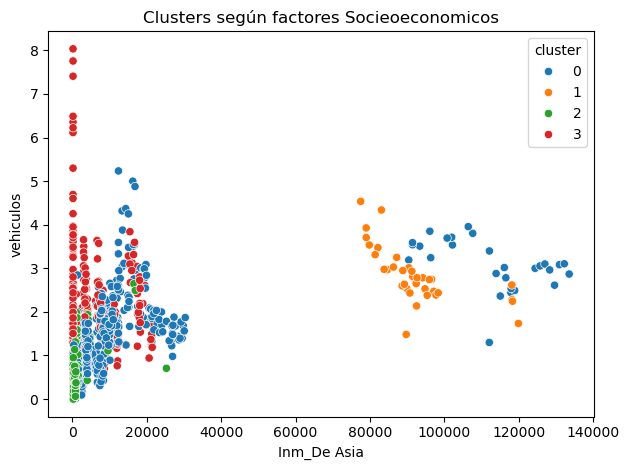

In [49]:
# Visualización
sns.scatterplot(data=df, x="Inm_De Asia", y="vehiculos", hue="cluster", palette="tab10")
plt.title("Clusters según factores Socieoeconomicos")
plt.tight_layout()
plt.show()

In [11]:
# Guardar resultado
df.to_csv("Resultados_Clustering_sociecomonicos.csv", index=False)

In [53]:
df.head()

,Provincia,Trimestre,Anio,homicidios_consumados,drogas,homicidios_tentativa,lesiones,secuestro,sexual_agresion,sexual_otros,...,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_sl,Soc_num_sociedades_total,Soc_desembolso_sociedades_total,Paro_tasa_actividad,Paro_tasa_paro,Paro_tasa_empleo,cluster
0,Albacete,1,2017,0.000000,0.383048,0.025537,0.715023,0.0,0.000000,0.280902,...,2,120,597,21072,599,21192,57.42,24.48,43.36,3
1,Albacete,1,2018,0.025659,0.307913,0.000000,0.615827,0.0,0.076978,0.564508,...,2,215,611,48812,613,49027,58.97,23.82,44.92,3
2,Albacete,1,2019,0.000000,0.334508,0.000000,0.874866,0.0,0.025731,0.720478,...,2,75,666,52544,668,52619,57.38,17.85,47.13,2
3,Albacete,1,2020,0.000000,0.309125,0.000000,0.695532,0.0,0.025760,0.412167,...,3,175,486,9362,489,9537,56.58,20.72,44.85,3
4,Albacete,1,2021,0.000000,0.464056,0.000000,0.515618,0.0,0.051562,0.592961,...,3,164,617,21662,620,21826,57.58,19.93,46.10,3


In [55]:
df[['Provincia','cluster']].groupby(['Provincia','cluster']).value_counts().to_clipboard()

In [57]:
df.to_clipboard()

In [12]:
df.groupby("cluster")[features].mean().to_clipboard()

In [61]:
df.groupby("cluster")[features].min().to_clipboard()

In [63]:
df.groupby("cluster")[features].max()

,Desigualdad_p80p20,Soc_num_sociedades_sa,Soc_desmboldo_sociedades_sa,Soc_num_sociedades_sl,Soc_desembolso_sociedades_total,Paro_tasa_paro,Paro_tasa_actividad,Paro_tasa_empleo
cluster,,,,,,,,
0,3.069231,80,164920,16635,1498001,19.86,67.93,63.20
1,3.200000,246,166599,24433,1437866,14.23,63.65,58.03
2,2.900000,15,164920,5226,273844,25.63,57.91,50.43
3,5.000000,17,10821,7080,359063,33.87,65.54,49.93
